# Forecasting of Market Mood Index and NIFTY Index

In [2]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)
data.columns = [col.strip() for col in data.columns]

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

data.head()


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 100.9 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.8 MB 100.9 kB/s eta 0:01:38
   ---------------------------------------- 0.0/9.8 MB 103.4 kB/s eta 0:01:35
   ---------------------------------------- 0.1/9.8 MB 148.8 kB/s eta 0:01:06
   ---------------------------------------- 0.1/9.8 MB 157.1 kB/s eta 0:01:03
   ---------------------------------------- 0.1/9.8 MB 15

,Market Mood Index,Nifty Index
Date,,
2024-06-07,51.525161,23290.15
2024-06-06,43.454809,22821.40
2024-06-05,35.283719,22620.35
2024-06-04,48.996059,21884.50
2024-06-03,59.844635,23263.90


## Forecasting with Exponential Smoothing

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_mode

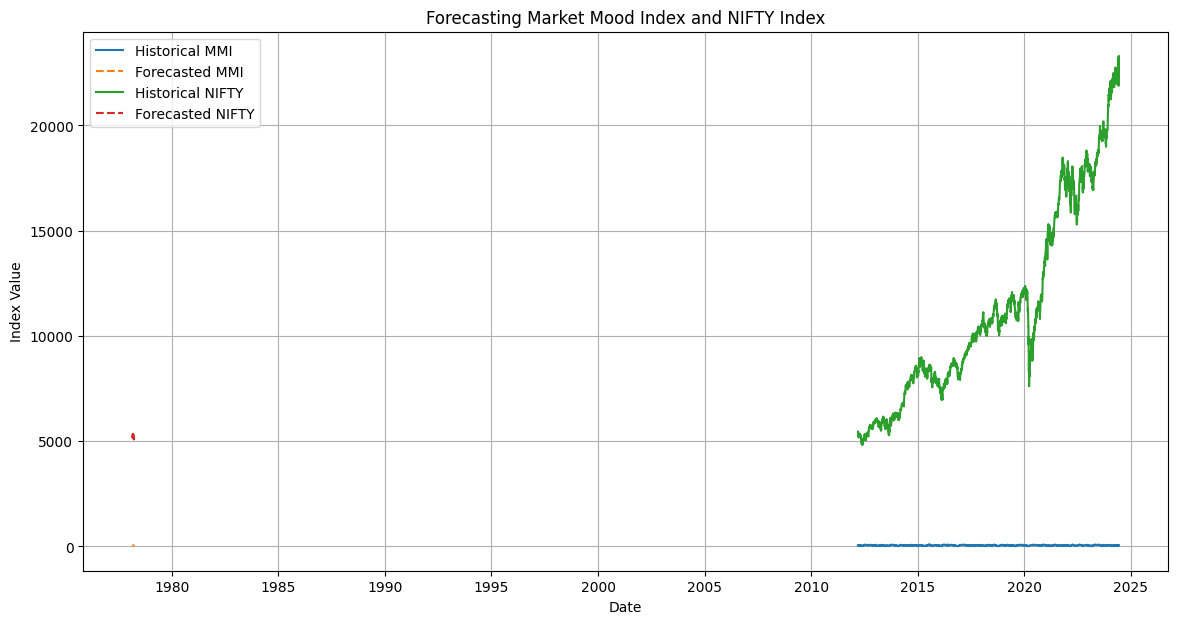

In [3]:
model_mmi = ExponentialSmoothing(data['Market Mood Index'], trend='add', seasonal='add', seasonal_periods=365)
fit_mmi = model_mmi.fit()
forecast_mmi = fit_mmi.forecast(steps=30)

model_nifty = ExponentialSmoothing(data['Nifty Index'], trend='add', seasonal='add', seasonal_periods=365)
fit_nifty = model_nifty.fit()
forecast_nifty = fit_nifty.forecast(steps=30)

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Market Mood Index'], label='Historical MMI')
plt.plot(forecast_mmi.index, forecast_mmi, label='Forecasted MMI', linestyle='--')
plt.plot(data.index, data['Nifty Index'], label='Historical NIFTY')
plt.plot(forecast_nifty.index, forecast_nifty, label='Forecasted NIFTY', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Forecasting Market Mood Index and NIFTY Index')
plt.legend()
plt.grid(True)
plt.show()